In [1]:
# ur
import pandas 
import scipy 
import numpy 
from sklearn.preprocessing import MinMaxScaler 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = pandas.read_csv(url, names=names) 
array = dataframe.values 
  
# separate array into input and output components 
X = array[:,0:8] 
Y = array[:,8] 
scaler = MinMaxScaler(feature_range=(0, 1)) 
rescaledX = scaler.fit_transform(X) 
  
# summarize transformed data 
numpy.set_printoptions(precision=3) 
print(rescaledX[0:5,:]) 


HTTPError: HTTP Error 404: Not Found

In [2]:
import pandas as pd
#

In [4]:
x_train=pd.read_csv('data1/X_train.csv')
y_train=pd.read_csv('data1/Y_train.csv')

In [5]:
x_test=pd.read_csv('data1/X_test.csv')
y_test=pd.read_csv('data1/Y_test.csv')

In [6]:
x_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban


In [7]:
import matplotlib.pyplot as plt
x_train[x_train.dtypes[(x_train.dtypes=="float64")|(x_train.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025014434B70>,
      dtype=object)

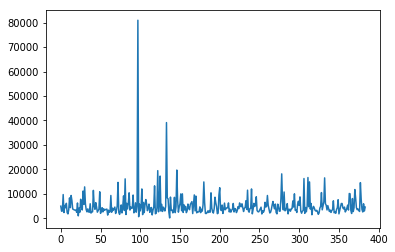

In [10]:
plt.plot(x_train['ApplicantIncome'])

After understanding these plots, we infer that ApplicantIncome and CoapplicantIncome are in similar range (0-50000$) where as LoanAmount is in thousands and it ranges from 0 to 600$. The story for Loan_Amount_Term is completely different from other variables because its unit is months as opposed to other variables where the unit is dollars.

If we try to apply distance based methods such as kNN on these features, feature with the largest range will dominate the outcome results and we’ll obtain less accurate predictions. We can overcome this trouble using feature scaling. Let’s do it practically.



In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train[['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term', 'Credit_History']],y_train)
# Checking the performance of our model on the testing data set


C:\Users\Basant\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
from sklearn.metrics import accuracy_score
acc=(knn.score((x_test[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']]),y_test))


In [25]:
acc

0.6145833333333334

This might be happening because of some insignificant variable with larger range will be dominating the objective function. We can remove this problem by scaling down all the features to a same range. sklearn provides a tool MinMaxScaler that will scale down all the features between 0 and 1. Mathematical formula for MinMaxScaler is.


In [26]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
x_train_minmax=min_max.fit_transform(x_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
x_test_minmax=min_max.fit_transform(x_test[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])


In [28]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_minmax,y_train)
# Checking the model's accuracy
accuracy_score(y_test,knn.predict(x_test_minmax))


C:\Users\Basant\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


0.75

Feature Standardization


In logistic regression, each feature is assigned a weight or coefficient (Wi). If there is a feature with relatively large range and it is insignificant in the objective function then logistic regression will itself assign a very low value to its co-efficient, thus neutralizing the dominant effect of that particular feature, whereas distance based method such as kNN does not have this inbuilt strategy, thus it requires scaling.

Aren’t we forgetting something ? Our logistic model is still predicting with an accuracy almost closer to a guess.



The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

In [30]:
# Standardizing the train and test data
from sklearn.preprocessing import scale
x_train_scale=scale(x_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
x_test_scale=scale(x_test[['ApplicantIncome', 'CoapplicantIncome',
               'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
# Fitting logistic regression on our standardized data set
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l2',C=.01)
log.fit(x_train_scale,y_train)
# Checking the model's accuracy
accuracy_score(y_test,log.predict(x_test_scale))


C:\Users\Basant\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.75

In previous sections, we did the pre-processing for continuous numeric features. But, our data set has other features too such as Gender, Married, Dependents, Self_Employed and Education. All these categorical features have string values. For example, Gender has two levels either Male or Female. Lets feed the features in our logistic regression model.



In [32]:
# Fitting a logistic regression model on whole data
log=LogisticRegression(penalty='l2',C=.01)
log.fit(x_train,y_train)
# Checking the model's accuracy
accuracy_score(y_test,log.predict(x_test))


ValueError: could not convert string to float: 'Semiurban'

In [35]:
# Importing LabelEncoder and initializing it
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in x_test.columns.values:
       # Encoding only categorical variables
       if x_test[col].dtypes=='object':
            # Using whole data to form an exhaustive list of levels
            data=x_train[col].append(x_test[col])
            le.fit(data.values)
            x_train[col]=le.transform(x_train[col])
            x_test[col]=le.transform(x_test[col])


In [36]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False)
x_train_1=x_train
x_test_1=x_test
columns=['Gender', 'Married', 'Dependents', 'Education','Self_Employed',
          'Credit_History', 'Property_Area']
for col in columns:
       # creating an exhaustive list of all possible categorical values
       data=x_train[[col]].append(x_test[[col]])
       enc.fit(data)
       # Fitting One Hot Encoding on train data
       temp = enc.transform(x_train[[col]])
       # Changing the encoded features into a data frame with new column names
       temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
       # In side by side concatenation index values should be same
       # Setting the index values similar to the X_train data frame
       temp=temp.set_index(x_train.index.values)
       # adding the new One Hot Encoded varibales to the train data frame
       X_train_1=pd.concat([x_train_1,temp],axis=1)
       # fitting One Hot Encoding on test data
       temp = enc.transform(x_test[[col]])
       # changing it into data frame and adding column names
       temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
       # Setting the index for proper concatenation
       temp=temp.set_index(x_test.index.values)
       # adding the new One Hot Encoded varibales to test data frame
       X_test_1=pd.concat([x_test_1,temp],axis=1)


In [37]:
x_train_scale=scale(x_train_1)
x_test_scale=scale(x_test_1)
# Fitting a logistic regression model
log=LogisticRegression(penalty='l2',C=1)
log.fit(x_train_scale,y_train)
# Checking the model's accuracy
accuracy_score(y_test,log.predict(x_test_scale))


C:\Users\Basant\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7395833333333334

Low pass filter

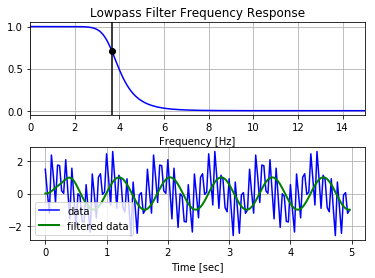

In [39]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()


In [40]:
import pandas as pd
import numpy as np
import copy
%matplotlib inline

In [41]:
df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')

df_flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [45]:
import csv
with open('occpancy detect.csv', 'rb') as f:
    reader = csv.reader(f, delimiter=',')
    


In [46]:
reader.head()

AttributeError: '_csv.reader' object has no attribute 'head'

In [51]:
type(reader)

_csv.reader

In [54]:
reader=pd.read_csv('occpancy detect.csv', header=None, skiprows=1)

In [55]:
reader.head()

,0,1,2,3,4,5,6
0,2/11/2015 14:48,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,2/11/2015 14:49,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,2/11/2015 14:50,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,2/11/2015 14:51,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,2/11/2015 14:51,21.7900,31.133333,437.333333,1005.666667,0.005030,1


pd.DataFrame('array') for conversion of array to DF

save file to hard disk

In [7]:
import csv
#csvRow = x2    #[x, ctr, clicks, spend, bidTotal, cpm, cpc]
csvfile = "train.csv"

for csvRow in x2:
#    csvRow.strip()
    with open(csvfile, "a", newline='') as fp:
        wr = csv.writer(fp, dialect='excel')
        wr.writerow(csvRow)



NameError: name 'x2' is not defined

Save model

In [8]:
# Save Model Using Pickle
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7559055118110236
